# **1. Import Data & Python Packages**


1.1 Python Packages ประกอบด้วย
  1. NumPy
  2. Pandas
  3. Matplotlib
  4. Seaborn

In [1]:
!pip install "pandas>=2.0.0"
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

1.2 Import data 'arabica_coffee_full_table.csv' ที่ได้มากจาก Kaggle: https://www.kaggle.com/datasets/erwinhmtang/coffee-quality-institute-reviews-may2023?select=arabica_coffee_certification_information.csv
โดยมีข้อมูลทั้งหมด 1509 entries และ ทั้งหมด 42 column ทั้งหมดจะเป็นข้อมูลที่ทางบริษัทผลิตเมล็ดกาแฟต่าง ส่งตัวอย่างเมล็ดกาแฟที่ผ่านกระบวนการแปรรูปแล้วมาทำการ Test เพี่อขอใบ Certificate สำหรับแสดงในฉลากผลิตภัณฑ์

In [2]:
df_arabica = pd.read_csv('arabica_coffee_full_table.csv')

# Preview
df_arabica.info(verbose=True, show_counts=True)
display(df_arabica.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   coffee_id              1509 non-null   object 
 1   Country_of_Origin      1508 non-null   object 
 2   Farm_Name              1151 non-null   object 
 3   Lot_Number             467 non-null    object 
 4   Mill                   1196 non-null   object 
 5   ICO_Number             1230 non-null   object 
 6   Company                1300 non-null   object 
 7   Altitude               1279 non-null   float64
 8   Region                 1450 non-null   object 
 9   Producer               1278 non-null   object 
 10  Number_of_Bags         1509 non-null   int64  
 11  Bag_Weight             1509 non-null   object 
 12  In_Country_Partner     1509 non-null   object 
 13  Harvest_Year           1462 non-null   object 
 14  Grading_Date           1509 non-null   object 
 15  Owne

,coffee_id,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,...,Color,Category_One_Defects,Category_Two_Defects,Quakers,Expiration,Certification_Body,Certification_Address,Certification_Contact,parsed_expiration,parsed_grading_date
0,#647123,Guatemala,san francisco cotzal,11/441/50,"inmobiliaria e inversiones dos mil, s.a.",11/441/50,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,...,Green,0,1,3.0,June 22 2023,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2023-06-22,2022-06-22
1,#927000,Guatemala,San jose del lago,11/15/95,San jose del lago,11/15/95,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,2,1.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
2,#902618,Guatemala,varias fincas,11/15/51,El Trèbol/Lìnea Gourmet,11/15/51,"Peter Schoenfeld, S.A.",1550.0,Oriente Santa rosa,varios productores,...,Green,0,2,1.0,March 21 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-03-21,2023-03-22
3,#781706,Guatemala,San jose del lago,11/15/96,San jose del lago,11/15/96,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",...,Green,0,1,0.0,April 16 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-16,2023-04-17
4,#237025,Guatemala,Finca Alta Luz,11-63-657,NaN,11-63-657,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,...,Green,0,5,1.0,April 25 2024,Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,2024-04-25,2023-04-26


# **2.Questioning and hypothesis**

2.1 คำถาม : กระบวนการแปรรูปเมล็ดกาแฟรูปแบบต่าง ๆ   มีผลต่อคะแนนรสสัมผัสและคุณภาพของกาแฟมากไหม  
  
สมมุติฐาน : มีผลค่อนข้างมาก



2.1.1 เริ่มจากการ clean data โดยการดูจำนวนของชุดข้อมูลของ Processing Methods(กระบวนการแปรรูป) กลุ่มต่างๆ ที่มีจำนวนข้อมูลน้อยมากๆ ออกไป เนื่องจากอาจทำให้ผลลัพธ์ที่ได้คลาดเคลื่อน ดังกราฟ 'Count of Process Methods'

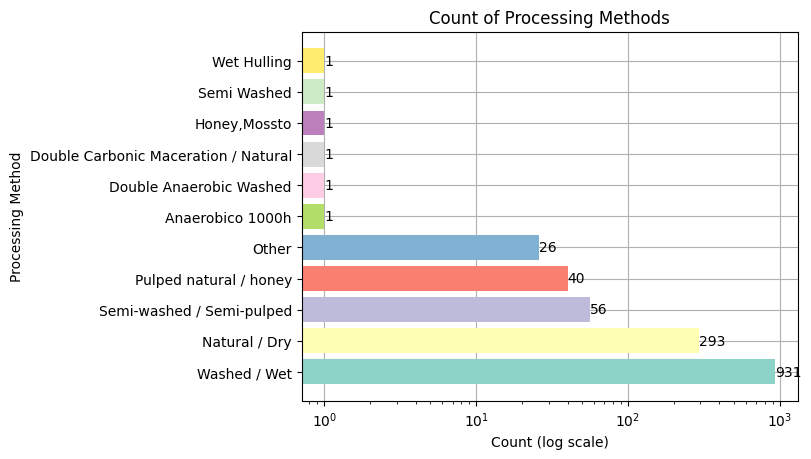

In [20]:
df2 = df_arabica.loc[:, ['Processing_Method']]
grouped = df_arabica.groupby('Processing_Method').size().sort_values(ascending=False)

# Define the colors for the bar graph
num_methods = len(grouped)
colors = plt.cm.Set3(np.linspace(0, 1, num_methods))
plt.barh(grouped.index, grouped.values, color=colors)
plt.xscale('log')

for i, v in enumerate(grouped.values):
    plt.text(v, i, str(v), ha='left', va='center')

plt.xlabel('Count (log scale)')
plt.ylabel('Processing Method')
plt.title('Count of Processing Methods')
plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background
plt.show()


2.1.2 พิจารณาอันดับ Processing Methods ที่ได้ค่าเฉลี่ย Total Cup points(คะแนนรวมที่บ่งบอกคุณภาพของกาแฟ)

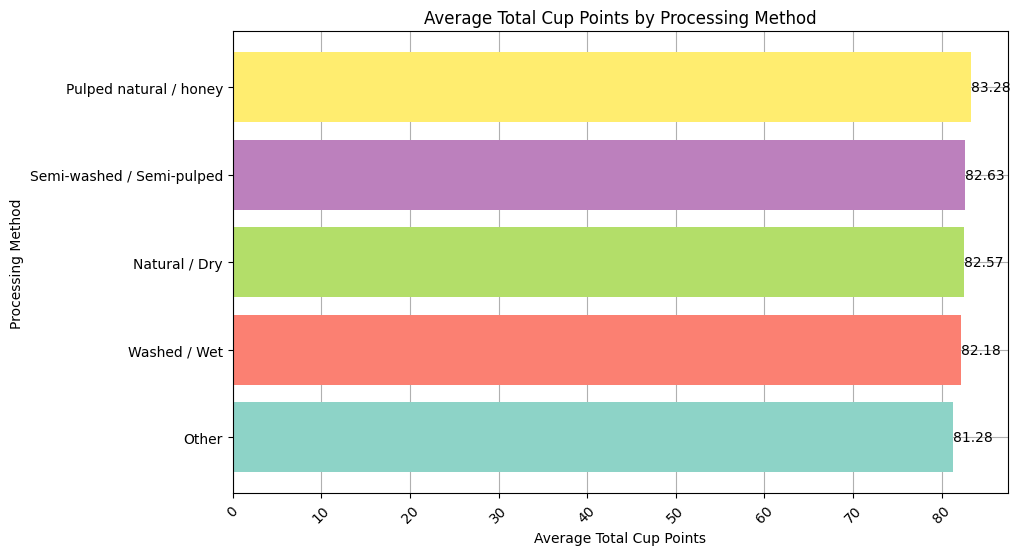

In [19]:
df3 = df_arabica.loc[ : , ['Processing_Method','Total_Cup_Points'] ]
filtered_df3 = df3[~(df3.groupby('Processing_Method').Processing_Method.transform('count') == 1)]
df4 = filtered_df3
df4_grouped = df4.groupby('Processing_Method').mean()
df4_grouped = df4_grouped.sort_values(by='Total_Cup_Points')


# Generate unique colors for each processing method
num_methods = len(df4_grouped)
colors = plt.cm.Set3(np.linspace(0, 1, num_methods))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(df4_grouped.index, df4_grouped['Total_Cup_Points'], color=colors)

# Add the value labels to each bar
for i, value in enumerate(df4_grouped['Total_Cup_Points']):
    plt.text(value, i, f'{value:.2f}', va='center')

# Customize the plot
plt.xlabel('Average Total Cup Points')
plt.ylabel('Processing Method')
plt.title('Average Total Cup Points by Processing Method')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid
plt.gca().set_axisbelow(True)  # Place grid on the background

# Show the plot
plt.show()

2.2.3 พิจารณา Procesing methods แต่ละแบบ มีคะแนนรสสัมผัสแตกต่างกันในมิติไหนอย่างไร

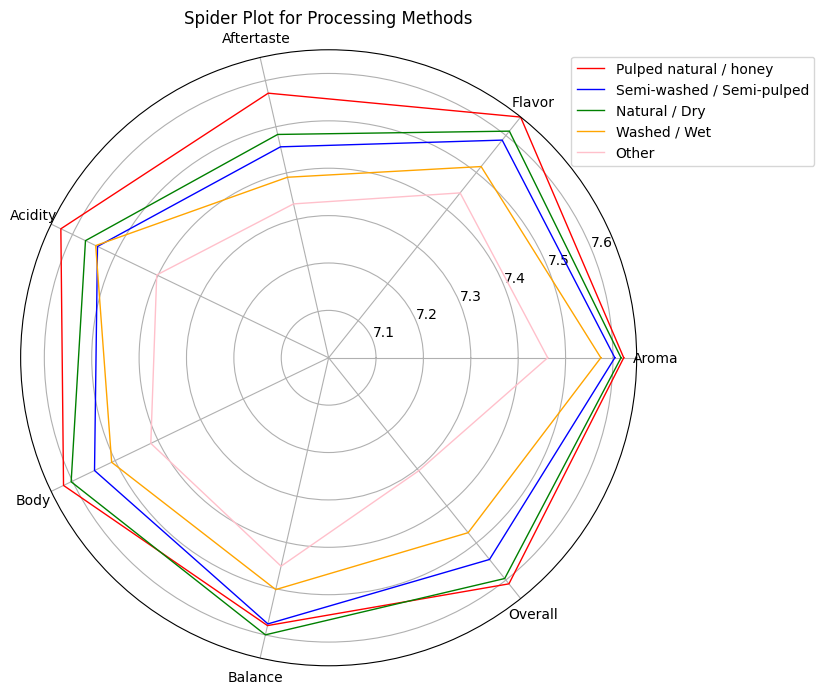

In [28]:
df5 = df_arabica.loc[ : , ['Processing_Method','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean_Cup','Sweetness','Overall','Total_Cup_Points'] ]
filtered_df1 = df5[~(df5.groupby('Processing_Method').Processing_Method.transform('count') == 1)]
grouped_df5 = filtered_df1.groupby('Processing_Method').mean().sort_values(by='Total_Cup_Points',ascending=False)
grouped_df5

# Define the attributes
attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance','Overall']

filtered_df = grouped_df5

processing_methods = grouped_df5.index

# Define the values for the spider plot
values = filtered_df.loc[:, attributes].values.tolist()
values = [row + [row[0]] for row in values]  # Repeat the first value to close the plot for each row

# Define the angles for each attribute
angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
angles += angles[:1]  # Repeat the first angle to close the plot

# Define the colors for the spider plot
colors = ['red', 'blue', 'green','orange','pink']  # Specify your desired colors here

# Create the spider plot
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'polar': True})

# Iterate over each row of values and plot a spider plot with custom line color
for row, color in zip(values, colors):
    ax.plot(angles, row, linewidth=1, linestyle='solid', color=color)

# Set the labels for each attribute
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)
ax.legend(labels=processing_methods, loc='upper right', bbox_to_anchor=(1.3, 1))
ax.set_ylim(7,7.65)
# Set the title of the plot
ax.set_title('Spider Plot for Processing Methods')



# Display the plot
plt.show()

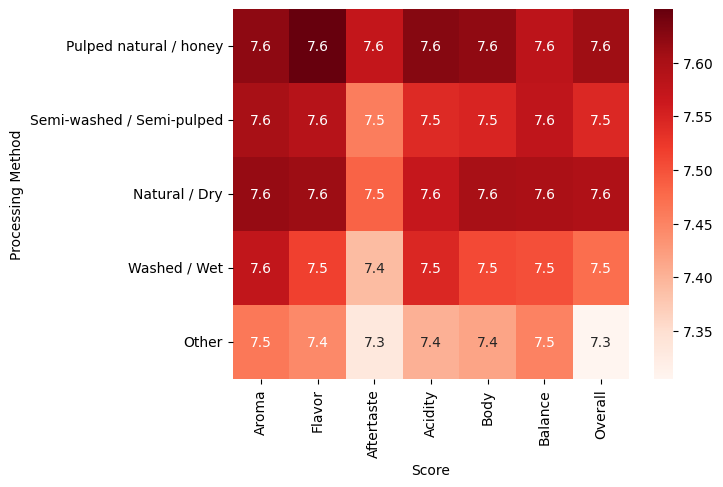

In [11]:
grouped_df6 = grouped_df5.loc[ : , ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Overall'] ]
sns.heatmap(grouped_df6, annot=True, cmap='Reds')
plt.xlabel('Score')
plt.ylabel('Processing Method')

plt.show()


2.2.4 พิจารณาโอกาสที่แต่ละ Procesing methods จะสามารถมีคะแนนที่สูงพอที่จะผ่านเป็น Specialty coffee(คือ กาแฟพิเศษ ที่วัดผลตั้งแต่เมล็ดกาแฟจนถึง Process ทุกอย่าง ที่ได้ Total cup points ตั้งแต่ 80 คะแนนเป็นต้นไป) มากน้อยแค่ไหน

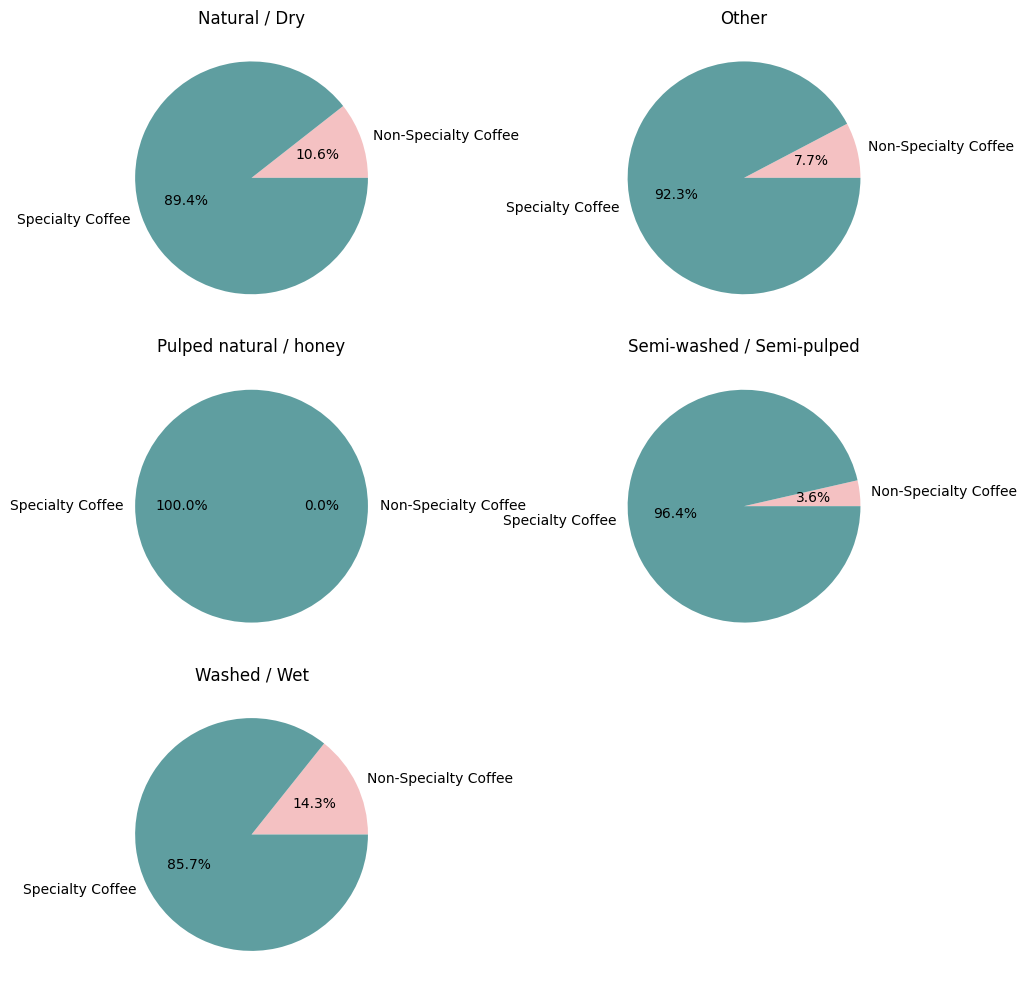

In [25]:
df6 = df_arabica.loc[ : , ['Processing_Method','Total_Cup_Points'] ]
filtered_df6 = df6[~(df6.groupby('Processing_Method').Processing_Method.transform('count') == 1)].dropna(subset=['Processing_Method'])
filtered_df7 = filtered_df6[filtered_df6['Total_Cup_Points'] >= 80]

grouped_df7 = filtered_df7.groupby('Processing_Method').agg({'Total_Cup_Points': 'count'}).reset_index()
grouped_df8 = grouped_df7.rename(columns={'Total_Cup_Points': 'Count of Specialty Coffee'})

grouped_df9 = filtered_df6[filtered_df6['Total_Cup_Points'] < 80].groupby('Processing_Method').size().reset_index(name='Count of Non-Specialty Coffee')
new_row = {'Processing_Method': 'Pulped natural / honey', 'Count of Non-Specialty Coffee': 0}
grouped_df9 = grouped_df9._append(new_row, ignore_index=True)

merged_df = grouped_df8.merge(grouped_df9, on='Processing_Method', how='outer')
# Determine the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Define custom colors for the pie charts
colors = ['#F4C1C2', '#5F9EA0']

# Iterate over each row and create a pie chart in the corresponding subplot
for i, row in merged_df.iterrows():
    if i < num_rows * num_cols:
        labels = ['Non-Specialty Coffee', 'Specialty Coffee']
        values = [row['Count of Non-Specialty Coffee'], row['Count of Specialty Coffee']]

        # Determine the subplot coordinates for the current row
        row_index = i // num_cols
        col_index = i % num_cols

        # Create the pie chart for the current row in the corresponding subplot
        ax = axes[row_index, col_index]
        ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
        ax.set_title(row['Processing_Method'])

# Remove the subplot that is not used
if len(merged_df) < num_rows * num_cols:
    fig.delaxes(axes[len(merged_df) // num_cols, len(merged_df) % num_cols])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots as a single picture
plt.show()

